# Random Forest Modelling

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


### Mengecek dataset setelah dilakukan fitur seleksi

In [11]:
train = pd.read_csv('D:/rakamin/final project/finpro_rakamin/finpro_rakamin/final_project\dataset/after_selection/train_after_selection.csv')



In [12]:
train.shape

(90310, 10)

In [14]:
train.head()

,Unnamed: 0,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction,Response
0,0,1,46.0,1,0,0,152.0,0,0,0
1,1,1,46.0,1,0,0,152.0,0,0,0
2,2,1,46.0,1,1,1,26.0,2,2,0
3,3,1,18.0,1,0,0,152.0,1,0,0
4,4,1,11.0,0,1,1,122.0,2,2,0


### Memisah feature dan target 

In [16]:
training_data, testing_data = train.drop(columns=['Response','Unnamed: 0']),train['Response']

### Membuat data test dan training dengan perbandingan 20:80

In [17]:
X_train, X_test, y_train, y_test = train_test_split(training_data,testing_data, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
20496,1,48.0,0,1,1,26.0,2,2
61232,1,28.0,0,2,1,26.0,2,2
63399,1,46.0,0,1,1,124.0,2,2
15134,1,16.0,0,0,0,152.0,0,0
467,1,28.0,1,1,0,55.0,2,0


In [19]:
X_train.shape

(72248, 8)

## Modelling dangan Random Forest Classifier

In [20]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih model pada data latih
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Hasil Prediksi

In [21]:
# Lakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Evaluasi lainnya (misalnya, classification report)
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      9076
           1       0.73      0.92      0.82      8986

    accuracy                           0.79     18062
   macro avg       0.81      0.79      0.79     18062
weighted avg       0.81      0.79      0.79     18062



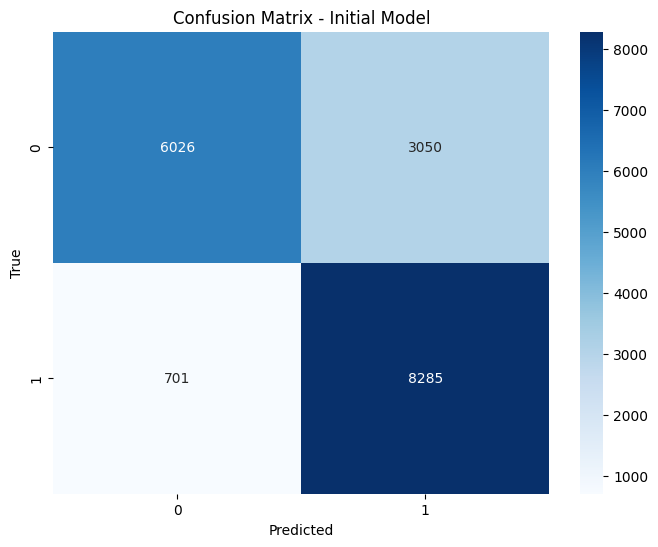

In [22]:
from sklearn.metrics import confusion_matrix

# Fungsi untuk plot matriks konfusi
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot matriks konfusi untuk model awal
plot_confusion_matrix(y_test, y_pred, classes=['0', '1'], title='Confusion Matrix - Initial Model')


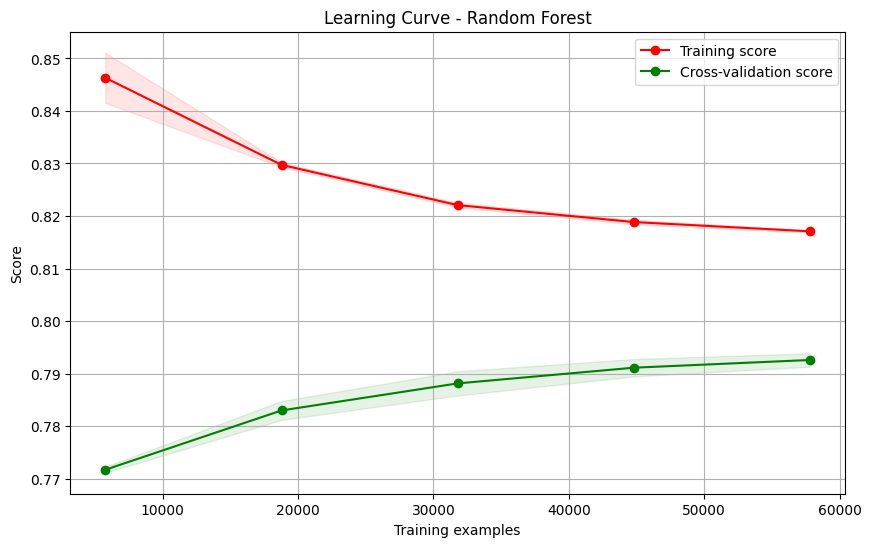

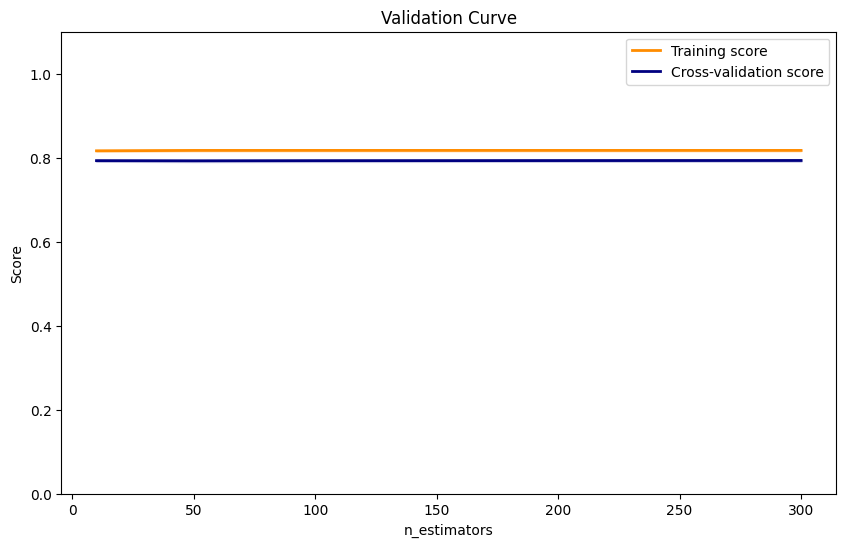

In [23]:
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5, scoring="accuracy"):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)

    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)

    plt.legend(loc="best")
    return plt

# Plot Learning Curve
title = "Learning Curve - Random Forest"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5)

# Plot Validation Curve 
param_range = [10, 50, 100, 200, 300]
plot_validation_curve(rf_model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

plt.show()

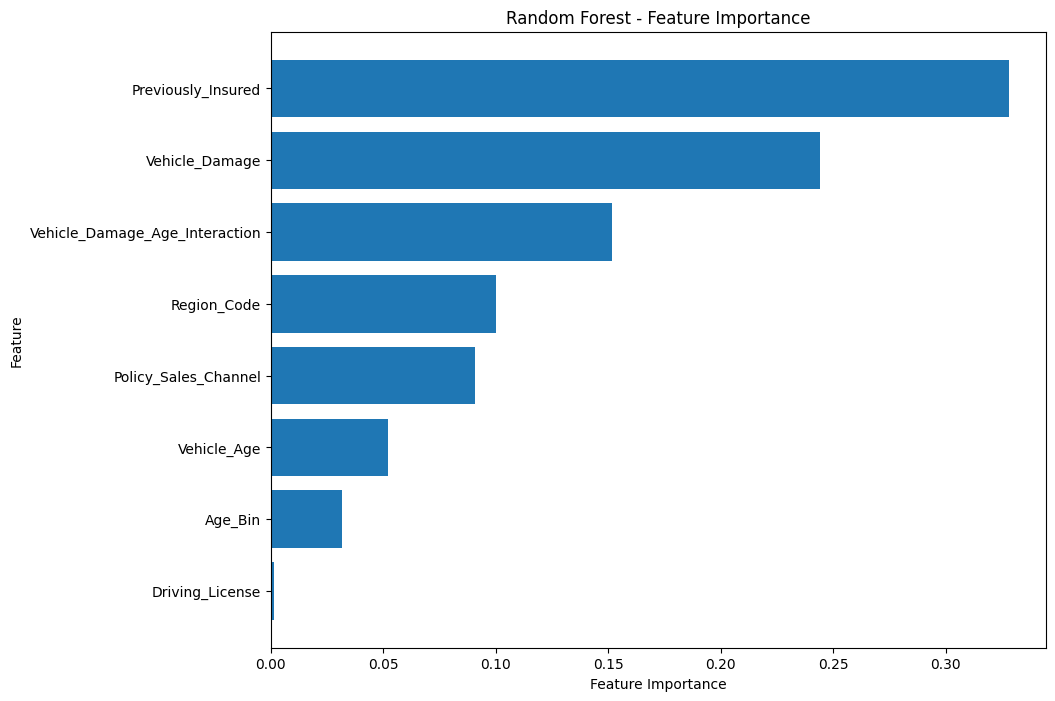

In [25]:
# Mendapatkan feature importance dari model
feature_importance = rf_model.feature_importances_

# Mendapatkan nama fitur
feature_names = X_train.columns

# Mengurutkan indeks fitur berdasarkan feature importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest - Feature Importance")
plt.show()

## Tuning

In [26]:
# Tentukan kumpulan hyperparameter yang ingin dioptimalkan
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_tuned = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='accuracy')

# Jalankan GridSearchCV pada data latih
grid_search.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Gunakan model dengan hyperparameter terbaik untuk evaluasi
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluasi akurasi model yang telah disesuaikan
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Model Accuracy: 0.80


In [30]:

# Evaluasi akurasi
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy: {accuracy_tuned:.2f}')

# Evaluasi lainnya (misalnya, classification report)
print(classification_report(y_test, y_pred_tuned))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      9076
           1       0.73      0.93      0.82      8986

    accuracy                           0.80     18062
   macro avg       0.82      0.80      0.79     18062
weighted avg       0.82      0.80      0.79     18062



<module 'matplotlib.pyplot' from 'c:\\Users\\Muhammad Iqbal\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

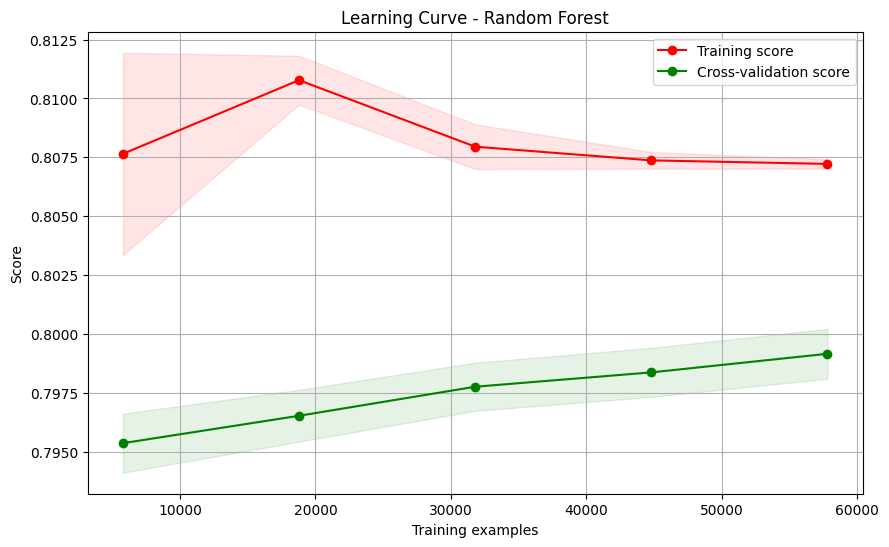

In [27]:
# Plot Learning Curve Tuning
title = "Learning Curve - Random Forest"
plot_learning_curve(best_rf_model, title, X_train, y_train, cv=5)

<module 'matplotlib.pyplot' from 'c:\\Users\\Muhammad Iqbal\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

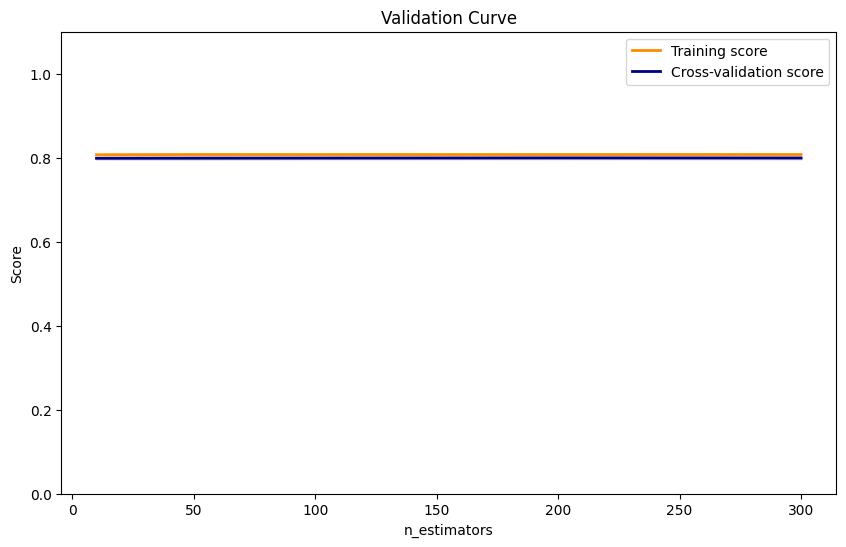

In [29]:
# Plot Validation Curve 
param_range = [10, 50, 100, 200, 300]
plot_validation_curve(best_rf_model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

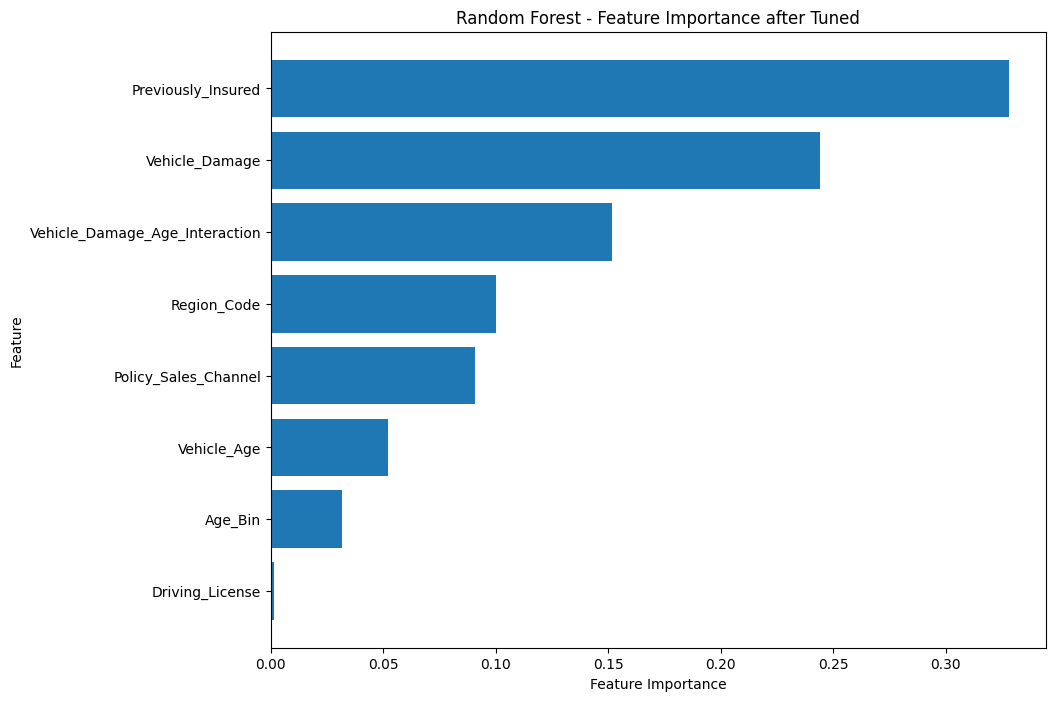

In [32]:
# Mendapatkan feature importance dari model
feature_importance_tuned = best_rf_model.feature_importances_

# Mendapatkan nama fitur
feature_names = X_train.columns

# Mengurutkan indeks fitur berdasarkan feature importance
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest - Feature Importance after Tuned")
plt.show()

### Hasil prediksi dibandingkan dengan data aktual

In [33]:
df_test = pd.read_csv('../dataset/after_selection/test_after_selection.csv')
sub = pd.read_csv('../dataset/main/sample_submission.csv')


In [34]:
test = df_test.drop(columns=['Unnamed: 0'])

In [35]:
test.sample(10)

,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Age_Bin,Vehicle_Damage_Age_Interaction
116405,1,36.0,0,2,1,124.0,0,0
56590,1,11.0,1,0,0,152.0,0,0
100035,1,28.0,0,0,1,152.0,0,0
78218,1,8.0,0,1,1,26.0,0,0
76678,1,37.0,0,0,1,152.0,0,0
118143,1,36.0,1,0,1,26.0,0,0
34563,1,29.0,1,0,0,152.0,0,0
104587,1,3.0,1,1,0,26.0,0,0
33924,1,30.0,1,0,0,152.0,0,0
77297,1,8.0,1,0,0,152.0,0,0


In [36]:
sub.sample(10)

,id,Response
36968,418078,0
29737,410847,0
24436,405546,0
89966,471076,0
54543,435653,0
52599,433709,0
17929,399039,0
74729,455839,0
3930,385040,0
15621,396731,0


In [37]:
y_pred1 = best_rf_model.predict(test)
predictions2 = [round(value) for value in y_pred1]

In [38]:
test_2 = pd.DataFrame()

test_2['Response'] = sub['Response']
test_2["Pred_Response"] = predictions2


In [39]:
test_2

,Response,Pred_Response
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
127032,0,0
127033,0,1
127034,0,0
127035,0,0


In [40]:
accuracy_2 = accuracy_score(test_2['Response'].values, test_2['Pred_Response'].values)
print("Accuracy: %.2f%%" % (accuracy_2 * 100.0))

Accuracy: 59.30%


## Scalling

In [44]:
# Inisialisasi dan fit StandardScaler pada data latih
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Terapkan transformasi yang sama pada data uji
X_test_scaled = scaler.transform(X_test)

In [45]:

rf_model_scaled = RandomForestClassifier(random_state=42)


rf_model_scaled.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [46]:

y_pred_scaled = rf_model_scaled.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred_scaled))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      9076
           1       0.73      0.92      0.82      8986

    accuracy                           0.79     18062
   macro avg       0.81      0.79      0.79     18062
weighted avg       0.81      0.79      0.79     18062



Hasil scalling tidak menunjukkan perubahan hasil prediksi maka modelling dangan scalling tidak dilanjutkan